# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

i = 0
j = 1

for city in cities:   
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])        
        max_temp.append(response['main']['temp_max'])  
        humidity.append(response["main"]["humidity"])        
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])            
        print(f"Processing Record {i} of Set {j} : {city}") 
        i = i + 1
        if i > 49:
            i = 0
            j = j + 1
            
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval 
-----------------------------
Processing Record 0 of Set 1 : daru
Processing Record 1 of Set 1 : punta arenas
Processing Record 2 of Set 1 : millinocket
City not found. Skipping...
Processing Record 3 of Set 1 : pizarro
Processing Record 4 of Set 1 : hermanus
Processing Record 5 of Set 1 : airai
Processing Record 6 of Set 1 : cape town
Processing Record 7 of Set 1 : drumheller
Processing Record 8 of Set 1 : hobart
Processing Record 9 of Set 1 : albany
Processing Record 10 of Set 1 : cabedelo
Processing Record 11 of Set 1 : mataura
Processing Record 12 of Set 1 : zhigansk
Processing Record 13 of Set 1 : soke
Processing Record 14 of Set 1 : saint-pierre
Processing Record 15 of Set 1 : saint george
Processing Record 16 of Set 1 : hilo
City not found. Skipping...
Processing Record 17 of Set 1 : vaini
City not found. Skipping...
Processing Record 18 of Set 1 : hovd
Processing Record 19 of Set 1 : rikitea
Processing Record 20 of Set 1 : new norfolk
Processing Record

Processing Record 34 of Set 4 : berezovka
Processing Record 35 of Set 4 : mount gambier
Processing Record 36 of Set 4 : kiama
Processing Record 37 of Set 4 : gilgit
Processing Record 38 of Set 4 : ahuimanu
Processing Record 39 of Set 4 : honiara
City not found. Skipping...
Processing Record 40 of Set 4 : okhotsk
Processing Record 41 of Set 4 : gao
Processing Record 42 of Set 4 : qaanaaq
Processing Record 43 of Set 4 : chernyshevskiy
Processing Record 44 of Set 4 : moss vale
Processing Record 45 of Set 4 : kropotkin
Processing Record 46 of Set 4 : trinidad
Processing Record 47 of Set 4 : ostersund
Processing Record 48 of Set 4 : namibe
Processing Record 49 of Set 4 : antofagasta
Processing Record 0 of Set 5 : la baule-escoublac
Processing Record 1 of Set 5 : chardara
Processing Record 2 of Set 5 : charters towers
Processing Record 3 of Set 5 : nha trang
Processing Record 4 of Set 5 : ilulissat
Processing Record 5 of Set 5 : tiksi
Processing Record 6 of Set 5 : coro
Processing Record 7 o

Processing Record 26 of Set 8 : petrolina
Processing Record 27 of Set 8 : geraldton
Processing Record 28 of Set 8 : karlskrona
Processing Record 29 of Set 8 : ostrovnoy
City not found. Skipping...
City not found. Skipping...
Processing Record 30 of Set 8 : great bend
Processing Record 31 of Set 8 : inhambane
Processing Record 32 of Set 8 : belaya gora
Processing Record 33 of Set 8 : chifeng
Processing Record 34 of Set 8 : arman
Processing Record 35 of Set 8 : fairbanks
Processing Record 36 of Set 8 : kontagora
Processing Record 37 of Set 8 : hingoli
Processing Record 38 of Set 8 : keti bandar
Processing Record 39 of Set 8 : north bend
Processing Record 40 of Set 8 : tanout
Processing Record 41 of Set 8 : nyurba
Processing Record 42 of Set 8 : stromness
Processing Record 43 of Set 8 : avera
City not found. Skipping...
Processing Record 44 of Set 8 : hassan
Processing Record 45 of Set 8 : bethel
City not found. Skipping...
Processing Record 46 of Set 8 : sao lourenco do oeste
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weatherpy_df = pd.DataFrame({"City": city_name,
                            "Latitude": lat,
                            "Longitude": long,
                            "Maximum Temperature": max_temp,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
                            "Country": country,
                            "Date": date})
weatherpy_df.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Daru,-9.0763,143.2092,76.64,91,88,8.25,PG,1618855570
1,Punta Arenas,-53.1500,-70.9167,51.80,71,20,2.30,CL,1618855220
2,Millinocket,45.6573,-68.7098,59.00,36,75,8.05,US,1618855070
3,Pizarro,4.9533,-77.3660,83.07,73,83,8.97,CO,1618855570
4,Hermanus,-34.4187,19.2345,63.00,79,100,14.00,ZA,1618855571


In [5]:
weatherpy_df.describe()

,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,19.833042,18.846162,60.989176,65.716846,52.562724,8.344910,1.618856e+09
std,33.522952,89.142228,22.307133,23.221564,38.347492,5.313786,1.800347e+02
min,-54.800000,-175.200000,-15.720000,5.000000,0.000000,0.360000,1.618855e+09
25%,-9.038875,-60.947175,48.000000,50.000000,14.250000,4.542500,1.618855e+09
50%,24.314000,20.877350,63.740000,70.000000,55.500000,7.010000,1.618856e+09
75%,48.401450,96.955525,78.800000,84.750000,90.000000,11.217500,1.618856e+09
max,78.218600,178.416700,102.990000,100.000000,100.000000,28.770000,1.618856e+09


In [6]:
weatherpy_df.to_csv("../output_data/city.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weatherpy_df.loc[weatherpy_df['Humidity'] >= 100]
high_humidity

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
12,Zhigansk,66.7697,123.3711,-1.59,100,59,8.41,RU,1618855573
87,Esperance,-33.8667,121.9000,55.40,100,40,9.19,AU,1618855275
91,Kuching,1.5500,110.3333,73.40,100,40,1.14,MY,1618855590
99,Saskylakh,71.9167,114.0833,-15.16,100,90,4.14,RU,1618855307
177,Kununurra,-15.7667,128.7333,62.60,100,11,3.44,AU,1618855311
205,Tiksi,71.6872,128.8694,-7.53,100,63,4.27,RU,1618855308
312,Valparaíso,-33.0393,-71.6273,57.20,100,90,5.75,CL,1618855638
391,Nyurba,63.2842,118.3319,-5.15,100,60,2.89,RU,1618855659
443,Golden,39.7555,-105.2211,35.01,100,90,8.05,US,1618855674
538,Gander,48.9682,-54.5906,41.00,100,90,5.75,CA,1618855698


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weatherpy_df.loc[weatherpy_df['Humidity'] != 100]
clean_city_data.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Daru,-9.0763,143.2092,76.64,91,88,8.25,PG,1618855570
1,Punta Arenas,-53.1500,-70.9167,51.80,71,20,2.30,CL,1618855220
2,Millinocket,45.6573,-68.7098,59.00,36,75,8.05,US,1618855070
3,Pizarro,4.9533,-77.3660,83.07,73,83,8.97,CO,1618855570
4,Hermanus,-34.4187,19.2345,63.00,79,100,14.00,ZA,1618855571


In [9]:
clean_city_data.describe()

,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.681713,18.069298,61.563467,65.091241,52.366788,8.400420,1.618856e+09
std,33.337189,88.907081,21.672576,22.961276,38.509935,5.335484,1.802073e+02
min,-54.800000,-175.200000,-15.720000,5.000000,0.000000,0.360000,1.618855e+09
25%,-8.964025,-61.482375,48.200000,50.000000,13.750000,4.610000,1.618855e+09
50%,23.889000,20.696000,64.045000,70.000000,53.000000,7.115000,1.618856e+09
75%,47.594300,92.207150,78.800000,84.000000,90.000000,11.412500,1.618856e+09
max,78.218600,178.416700,102.990000,99.000000,100.000000,28.770000,1.618856e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

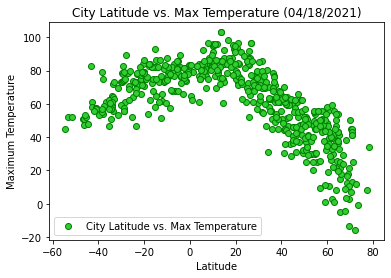

In [10]:
latitude = clean_city_data['Latitude']
temperature = clean_city_data['Maximum Temperature']
dated = "(04/18/2021)"

x_1 = latitude
y_1 = temperature
scatter1_label = "City Latitude vs. Max Temperature"

plt.scatter(x_1, y_1, label=scatter1_label, color="limegreen", edgecolor='green')
plt.legend(loc='best')
plt.title(f"City Latitude vs. Max Temperature {dated}")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.show()

## Latitude vs. Humidity Plot

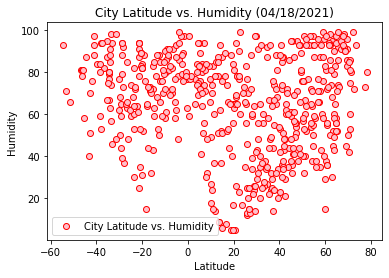

In [11]:
humid = clean_city_data['Humidity']

x_2 = latitude
y_2 = humid
scatter2_label = "City Latitude vs. Humidity"

plt.scatter(x_2, y_2, label=scatter2_label, color="pink", edgecolor='red')
plt.legend(loc='best')
plt.title(f"City Latitude vs. Humidity {dated}")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

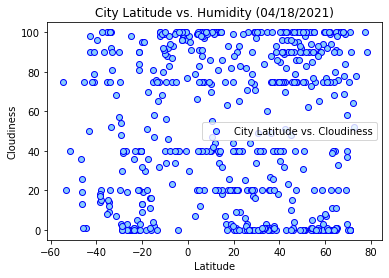

In [12]:
cloudy = clean_city_data['Cloudiness']

x_3 = latitude
y_3 = cloudy
scatter3_label = "City Latitude vs. Cloudiness"

plt.scatter(x_3, y_3, label=scatter3_label, color="lightskyblue", edgecolor='blue')
plt.legend(loc='best')
plt.title(f"City Latitude vs. Humidity {dated}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

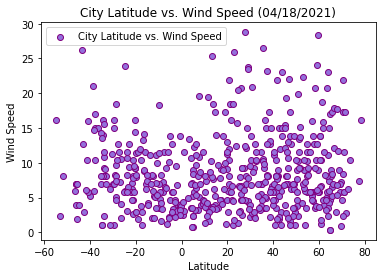

In [13]:
speed_wind = clean_city_data['Wind Speed']

x_4 = latitude
y_4 = speed_wind
scatter4_label = "City Latitude vs. Wind Speed"

plt.scatter(x_4, y_4, label=scatter4_label, color="mediumpurple", edgecolor='purple')
plt.legend(loc='best')
plt.title(f"City Latitude vs. Wind Speed {dated}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [14]:
northern_hemisphere = clean_city_data.loc[clean_city_data['Latitude'] > 0]
southern_hemisphere = clean_city_data.loc[clean_city_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8467131958606523


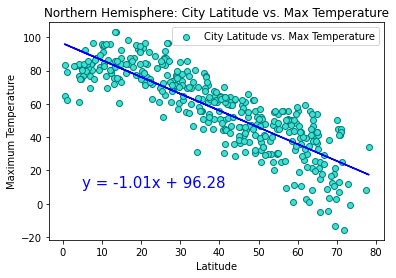

In [15]:
northern_latitude = northern_hemisphere['Latitude']
northern_temp = northern_hemisphere['Maximum Temperature']

x_5 = northern_latitude
y_5 = northern_temp
scatter5_label = "City Latitude vs. Max Temperature"

(slope5, intercept5, rvalue5, pvalue5, stderr5) = linregress(x_5, y_5)
regress_values5 = x_5 * slope5 + intercept5

line_eq5 = "y = " + str(round(slope5, 2)) + "x + " + str(round(intercept5, 2))

plt.scatter(x_5, y_5, label=scatter5_label, color="turquoise", edgecolor='teal')
plt.plot(x_5, regress_values5, "b-")
plt.annotate(line_eq5, (5, 10), fontsize=15, color="blue")
plt.legend(loc='best')
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue5}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6470420792644652


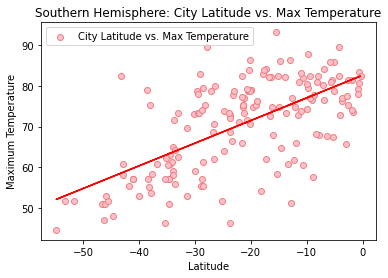

In [16]:
southern_latitude = southern_hemisphere['Latitude']
southern_temp = southern_hemisphere['Maximum Temperature']

x_6 = southern_latitude
y_6 = southern_temp
scatter6_label = "City Latitude vs. Max Temperature"

(slope6, intercept6, rvalue6, pvalue6, stderr6) = linregress(x_6, y_6)
regress_values6 = x_6 * slope6 + intercept6

line_eq6 = "y = " + str(round(slope6, 2)) + "x + " + str(round(intercept6, 2))

plt.scatter(x_6, y_6, label=scatter6_label, color="pink", edgecolor='lightcoral')
plt.plot(x_6, regress_values6, "r-")
plt.annotate(line_eq6, (-25, 40), fontsize=15, color="red")
plt.legend(loc='best')
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue6}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16536746749364023


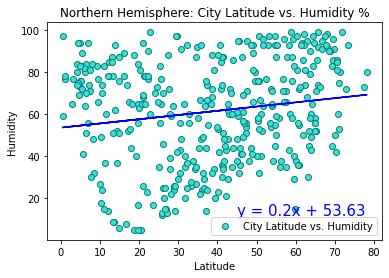

In [17]:
northern_humidity = northern_hemisphere['Humidity']

x_7 = northern_latitude
y_7 = northern_humidity
scatter7_label = "City Latitude vs. Humidity"

(slope7, intercept7, rvalue7, pvalue7, stderr7) = linregress(x_7, y_7)
regress_values7 = x_7 * slope7 + intercept7

line_eq7 = "y = " + str(round(slope7, 2)) + "x + " + str(round(intercept7, 2))

plt.scatter(x_7, y_7, label=scatter7_label, color="turquoise", edgecolor='teal')
plt.plot(x_7, regress_values7, "b-")
plt.annotate(line_eq7, (45, 12), fontsize=15, color="blue")
plt.legend(loc='best')
plt.title("Northern Hemisphere: City Latitude vs. Humidity %")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue7}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04258781258166168


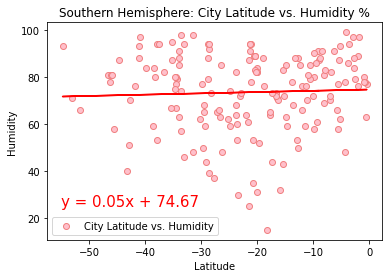

In [18]:
southern_humidity = southern_hemisphere['Humidity']

x_8 = southern_latitude
y_8 = southern_humidity
scatter8_label = "City Latitude vs. Humidity"

(slope8, intercept8, rvalue8, pvalue8, stderr8) = linregress(x_8, y_8)
regress_values8 = x_8 * slope8 + intercept8

line_eq8 = "y = " + str(round(slope8, 2)) + "x + " + str(round(intercept8, 2))

plt.scatter(x_8, y_8, label=scatter8_label, color="pink", edgecolor='lightcoral')
plt.plot(x_8, regress_values8, "r-")
plt.annotate(line_eq8, (-55, 25), fontsize=15, color="red")
plt.legend(loc='best')
plt.title("Southern Hemisphere: City Latitude vs. Humidity %")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue8}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.037433547433177464


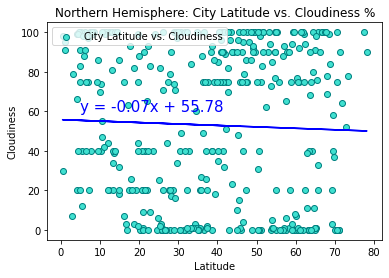

In [19]:
northern_cloudiness = northern_hemisphere['Cloudiness']

x_9 = northern_latitude
y_9 = northern_cloudiness
scatter9_label = "City Latitude vs. Cloudiness"

(slope9, intercept9, rvalue9, pvalue9, stderr9) = linregress(x_9, y_9)
regress_values9 = x_9 * slope9 + intercept9

line_eq9 = "y = " + str(round(slope9, 2)) + "x + " + str(round(intercept9, 2))

plt.scatter(x_9, y_9, label=scatter9_label, color="turquoise", edgecolor='teal')
plt.plot(x_9, regress_values9, "b-")
plt.annotate(line_eq9, (5, 60), fontsize=15, color="blue")
plt.legend(loc='best')
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness %")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue9}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2565604723083763


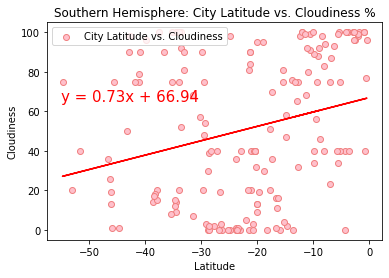

In [20]:
southern_cloud = southern_hemisphere['Cloudiness']

x_10 = southern_latitude
y_10 = southern_cloud
scatter10_label = "City Latitude vs. Cloudiness"

(slope10, intercept10, rvalue10, pvalue10, stderr10) = linregress(x_10, y_10)
regress_values10 = x_10 * slope10 + intercept10

line_eq10 = "y = " + str(round(slope10, 2)) + "x + " + str(round(intercept10, 2))

plt.scatter(x_10, y_10, label=scatter10_label, color="pink", edgecolor='lightcoral')
plt.plot(x_10, regress_values10, "r-")
plt.annotate(line_eq10, (-55, 65), fontsize=15, color="red")
plt.legend(loc='best')
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness %")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue10}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09059468487311646


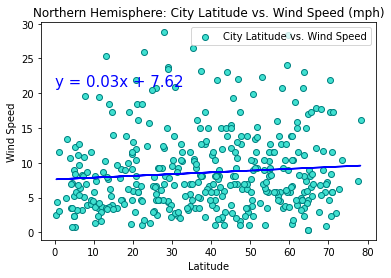

In [21]:
northern_wind = northern_hemisphere['Wind Speed']

x_11 = northern_latitude
y_11 = northern_wind
scatter11_label = "City Latitude vs. Wind Speed"

(slope11, intercept11, rvalue11, pvalue11, stderr11) = linregress(x_11, y_11)
regress_values11 = x_11 * slope11 + intercept11

line_eq11 = "y = " + str(round(slope11, 2)) + "x + " + str(round(intercept11, 2))

plt.scatter(x_11, y_11, label=scatter11_label, color="turquoise", edgecolor='teal')
plt.plot(x_11, regress_values11, "b-")
plt.annotate(line_eq11, (0, 21), fontsize=15, color="blue")
plt.legend(loc='best')
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue11}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: -0.24929926995387355


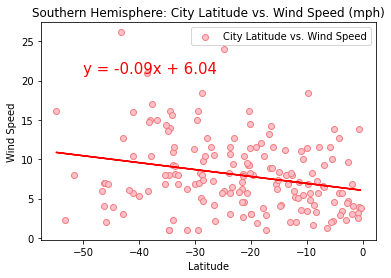

In [22]:
southern_wind = southern_hemisphere['Wind Speed']

x_12 = southern_latitude
y_12 = southern_wind
scatter12_label = "City Latitude vs. Wind Speed"

(slope12, intercept12, rvalue12, pvalue12, stderr12) = linregress(x_12, y_12)
regress_values12 = x_12 * slope12 + intercept12

line_eq12 = "y = " + str(round(slope12, 2)) + "x + " + str(round(intercept12, 2))

plt.scatter(x_12, y_12, label=scatter12_label, color="pink", edgecolor='lightcoral')
plt.plot(x_12, regress_values12, "r-")
plt.annotate(line_eq12, (-50, 21), fontsize=15, color="red")
plt.legend(loc='best')
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The correlation coefficient is: {rvalue12}")
plt.show()